# PROJECT - COMP 6321 (Machine Learning)
# Somaye GHAHARI - Mehrnoosh AMJADI - Bikash
# 40106359 - -

This is a Jupyter Notebook.

This section imports necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import time
%matplotlib inline
# sns.set_style('whitegrid')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
sns.set(style='ticks', palette='Set2')

## Loading and Preprocessing features PHASE
Credit dataframe is loaded and process to convert to acceptable format.

In [ ]:
# df_credit = pd.read_csv("archive/credits.csv", dtype='unicode')

# columns = ['cast', 'crew']

# for column in columns:
#     # use ast because json data has single quotes in the csv, which is invalid for a json object; it should be " normally
#     df_credit[column] = df_credit[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
# df_credit["id"] = pd.to_numeric(df_credit["id"])
# df_credit.head(10)

credit datasave is in json format. 
Here some of its information like actors' and director's name and gender are seperated in different columns in df_credits_flattened dataframe.

## Don't run below cell

In [ ]:
# start_time = time.time()
# df_credits_flattened = pd.DataFrame(None,None,columns=['id',
#                         'actor_1_gender','actor_2_gender','actor_3_gender',\
#                         'actor_1_name','actor_2_name','actor_3_name',\
#                         'director_gender','director_name'])
# new = {'id':np.nan,\
#               'actor_1_gender':np.nan,'actor_2_gender':np.nan,'actor_3_gender':np.nan,\
#               'actor_1_name':np.nan,'actor_2_name':np.nan,'actor_3_name':np.nan,\
#               'director_gender':np.nan,'director_name':np.nan}
# for i,row in df_credit.iterrows():
#     # dummy row
#     newrow=new
    
#     # fill id
#     #newrow['id'] = int(row['id'])

#     # fill cast
#     n1=[obj['name'] for obj in row['cast'] ]
#     n2=[obj['gender'] for obj in row['cast'] ]
#     x=min( len(n1), 3)
#     for c in range(x):
#         newrow['actor_'+str(c+1)+'_name'] = n1[c]
#         newrow['actor_'+str(c+1)+'_gender'] = int(n2[c])

#     # fill crew    
#     n1=[obj['name'] for obj in row['crew'] if obj["job"]=="Director"]
#     n2=[obj['gender'] for obj in row['crew'] if obj["job"]=="Director"]
#     if n1 and n2 :
#         newrow['director_name']=n1[0]
#         newrow['director_gender']=int(n2[0])
#     df_credits_flattened = df_credits_flattened.append(newrow,ignore_index=True)
# print("--- %s seconds ---" % (time.time() - start_time))


## Don't run below cell

In [ ]:
# df_credits_flattened.replace('', np.nan, inplace=True) 
# df_credits_flattened.replace('0', np.nan, inplace=True) 
# df_credits_flattened.replace('[]', np.nan, inplace=True) 
# df_credits_flattened.replace('0.0', np.nan, inplace=True) 

## Don't run below cell

In [ ]:
# df_credits_flattened["director_gender"] = pd.to_numeric(df_credits_flattened["director_gender"])
# df_credits_flattened["actor_1_gender"] = pd.to_numeric(df_credits_flattened["actor_1_gender"])
# df_credits_flattened["actor_2_gender"] = pd.to_numeric(df_credits_flattened["actor_2_gender"])
# df_credits_flattened["actor_3_gender"] = pd.to_numeric(df_credits_flattened["actor_3_gender"])
# df_credits_flattened["id"] = df_credit["id"]
# df_credits_flattened.info()

In [ ]:
# df_credits_flattened.to_csv("credits_flattened.csv", index=None)

## all the above steps are computed and saved to credits_flattened.csv file

Movie metadata dataframe is loaded into df_meta.

In [2]:
df_credits_flat = pd.read_csv("credits_flattened.csv", low_memory = False)
df_credits_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               45476 non-null  int64 
 1   actor_1_gender   45476 non-null  int64 
 2   actor_2_gender   45476 non-null  int64 
 3   actor_3_gender   45476 non-null  int64 
 4   actor_1_name     45476 non-null  object
 5   actor_2_name     45476 non-null  object
 6   actor_3_name     45476 non-null  object
 7   director_gender  45476 non-null  int64 
 8   director_name    45476 non-null  object
dtypes: int64(5), object(4)
memory usage: 3.1+ MB


In [3]:
df_meta = pd.read_csv("archive/movies_metadata.csv", low_memory=False)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

this section drops unnecessary columns and convert them to numeric values.

In [4]:
df_meta.drop(['adult', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title',\
              'overview', 'poster_path', 'production_companies', 'production_countries', 'runtime',\
              'spoken_languages', 'status', 'tagline','video'], axis=1, inplace=True)

In [5]:
df_meta.replace('', np.nan, inplace=True) 
df_meta.replace('0', np.nan, inplace=True) 
df_meta.replace('[]', np.nan, inplace=True) 
df_meta.replace('0.0', np.nan, inplace=True) 
df_meta.replace(0.0, np.nan, inplace=True)

df_meta['budget'] = pd.to_numeric(df_meta['budget'], errors='coerce')

df_meta['id'] = pd.to_numeric(df_meta['id'], errors='coerce')

df_meta['popularity'] = pd.to_numeric(df_meta['popularity'], errors='coerce')


df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        8890 non-null   float64
 1   genres        43024 non-null  object 
 2   id            45463 non-null  float64
 3   popularity    45394 non-null  float64
 4   release_date  45379 non-null  object 
 5   revenue       7408 non-null   float64
 6   title         45460 non-null  object 
 7   vote_average  42462 non-null  float64
 8   vote_count    42561 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


Two dataframe movie credits and movie metadata are merged here.

In [6]:
# merged_df = pd.concat([df_meta, credits_flattened], axis=1)
merged_df = pd.merge(df_meta, df_credits_flat, on=['id'], how='inner')
rate = merged_df['revenue'] / merged_df['budget']
merged_df.insert(3, "rate(revenue/budget)", rate, True) 
merged_df.info()
merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                8912 non-null   float64
 1   genres                43096 non-null  object 
 2   id                    45538 non-null  float64
 3   rate(revenue/budget)  5393 non-null   float64
 4   popularity            45469 non-null  float64
 5   release_date          45451 non-null  object 
 6   revenue               7428 non-null   float64
 7   title                 45535 non-null  object 
 8   vote_average          42531 non-null  float64
 9   vote_count            42630 non-null  float64
 10  actor_1_gender        45538 non-null  int64  
 11  actor_2_gender        45538 non-null  int64  
 12  actor_3_gender        45538 non-null  int64  
 13  actor_1_name          45538 non-null  object 
 14  actor_2_name          45538 non-null  object 
 15  actor_3_name       

,budget,genres,id,rate(revenue/budget),popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,4.043035,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,2,2,1,Robin Williams,Jonathan Hyde,Kirsten Dunst,2,Joe Johnston
2,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,NaN,11.712900,1995-12-22,NaN,Grumpier Old Men,6.5,92.0,2,2,1,Walter Matthau,Jack Lemmon,Ann-Margret,2,Howard Deutch
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,5.090760,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,1,1,1,Whitney Houston,Angela Bassett,Loretta Devine,2,Forest Whitaker
4,NaN,"[{'id': 35, 'name': 'Comedy'}]",11862.0,NaN,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,2,1,2,Steve Martin,Diane Keaton,Martin Short,2,Charles Shyer


In the following sections, total revenue of each director is caculated and is added to dataframe as revenue_y(last column).

In [7]:
def create_comparison_database(name, value, x, no_films, df):
    
    comparison_df = df.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum() 
        
    name_count_key = df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    return comparison_df[comparison_df['films'] >= no_films][[ name, value]]

In [8]:
x=create_comparison_database('director_name','revenue','mean', 0, merged_df)
final_df = pd.merge(merged_df, x, on=['director_name'], how='inner', suffixes=('','_director_mean'))
final_df.head(10)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 8912 non-null   float64
 1   genres                 43096 non-null  object 
 2   id                     45538 non-null  float64
 3   rate(revenue/budget)   5393 non-null   float64
 4   popularity             45469 non-null  float64
 5   release_date           45451 non-null  object 
 6   revenue                7428 non-null   float64
 7   title                  45535 non-null  object 
 8   vote_average           42531 non-null  float64
 9   vote_count             42630 non-null  float64
 10  actor_1_gender         45538 non-null  int64  
 11  actor_2_gender         45538 non-null  int64  
 12  actor_3_gender         45538 non-null  int64  
 13  actor_1_name           45538 non-null  object 
 14  actor_2_name           45538 non-null  object 
 15  ac

In this section, median of popularity of first actor is caculated and is added to dataframe as popularity_y(last column).

In [9]:
x=create_comparison_database('actor_1_name','popularity','mean', 0, final_df)
if not 'popularity_actor1_median' in final_df.columns:
    final_df = pd.merge(final_df, x, on=['actor_1_name'], how='inner', suffixes=('', '_actor1_mean'))

In [10]:
final_df

,budget,genres,id,rate(revenue/budget),popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name,revenue_director_mean,popularity_actor1_mean
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter,4.512031e+08,11.467777
1,90000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",863.0,5.526299,17.547693,1999-10-30,497366869.0,Toy Story 2,7.3,3914.0,2,2,1,Tom Hanks,Tim Allen,Joan Cusack,2,John Lasseter,4.512031e+08,11.467777
2,60000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",363676.0,3.974501,18.275689,2016-09-07,238470033.0,Sully,7.0,2106.0,2,2,1,Tom Hanks,Aaron Eckhart,Laura Linney,2,Clint Eastwood,1.069198e+08,11.467777
3,75000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6538.0,1.586672,9.979162,2007-12-19,119000410.0,Charlie Wilson's War,6.5,342.0,2,2,1,Tom Hanks,Philip Seymour Hoffman,Julia Roberts,2,Mike Nichols,8.059136e+07,11.467777
4,52000000.0,"[{'id': 18, 'name': 'Drama'}]",568.0,6.831499,18.761467,1995-06-30,355237933.0,Apollo 13,7.3,1637.0,2,2,2,Tom Hanks,Bill Paxton,Kevin Bacon,2,Ron Howard,1.954817e+08,11.467777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",65416.0,NaN,0.297741,1997-01-24,NaN,An American Vampire Story,4.5,4.0,2,0,2,Trevor Lissauer,Johnny Venocur,Adam West,0,Luis Esteban\t,NaN,0.297741
45534,NaN,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",365432.0,NaN,1.339355,2015-11-07,NaN,The Sublet,6.5,4.0,0,0,1,Tianna Nori,Mark Matechuk,Krista Madison,2,John Ainslie,NaN,1.339355
45535,NaN,"[{'id': 99, 'name': 'Documentary'}, {'id': 878...",36680.0,NaN,0.315713,2006-05-01,NaN,TechnoCalyps,5.0,1.0,2,1,2,Terence McKenna,Roberta Vasquez,Bruce Penhall,0,Frank Theys,NaN,0.315713
45536,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",420346.0,NaN,0.139936,2015-01-11,NaN,The Morning After,4.0,2.0,0,0,2,Markie Adams,Roberto Aguire,Tina Arning,0,Shanra J. Kehl,NaN,0.139936


In [11]:
def convert_json_to_list(dataframe):
    if isinstance(dataframe, float):
        pass
    else:
        values = []
        dataframe = ast.literal_eval(dataframe)
        if isinstance(dataframe, list):
            for keys in dataframe:
                values.append(keys['name'])
            return values
        else:
            return None

In [12]:
final_df['genres'] = final_df[['genres']].applymap(convert_json_to_list)
final_df['genres_Length'] = final_df['genres'].str.len()

In [13]:
final_df['genres_score'] = final_df['genres_Length']/final_df['genres_Length'].mean()
final_df

,budget,genres,id,rate(revenue/budget),popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name,revenue_director_mean,popularity_actor1_mean,genres_Length,genres_score
0,30000000.0,"[Animation, Comedy, Family]",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358
1,90000000.0,"[Animation, Comedy, Family]",863.0,5.526299,17.547693,1999-10-30,497366869.0,Toy Story 2,7.3,3914.0,2,2,1,Tom Hanks,Tim Allen,Joan Cusack,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358
2,60000000.0,"[Drama, History]",363676.0,3.974501,18.275689,2016-09-07,238470033.0,Sully,7.0,2106.0,2,2,1,Tom Hanks,Aaron Eckhart,Laura Linney,2,Clint Eastwood,1.069198e+08,11.467777,2.0,0.944239
3,75000000.0,"[Comedy, Drama, History]",6538.0,1.586672,9.979162,2007-12-19,119000410.0,Charlie Wilson's War,6.5,342.0,2,2,1,Tom Hanks,Philip Seymour Hoffman,Julia Roberts,2,Mike Nichols,8.059136e+07,11.467777,3.0,1.416358
4,52000000.0,[Drama],568.0,6.831499,18.761467,1995-06-30,355237933.0,Apollo 13,7.3,1637.0,2,2,2,Tom Hanks,Bill Paxton,Kevin Bacon,2,Ron Howard,1.954817e+08,11.467777,1.0,0.472119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,NaN,"[Comedy, Horror]",65416.0,NaN,0.297741,1997-01-24,NaN,An American Vampire Story,4.5,4.0,2,0,2,Trevor Lissauer,Johnny Venocur,Adam West,0,Luis Esteban\t,NaN,0.297741,2.0,0.944239
45534,NaN,"[Mystery, Drama, Thriller, Horror]",365432.0,NaN,1.339355,2015-11-07,NaN,The Sublet,6.5,4.0,0,0,1,Tianna Nori,Mark Matechuk,Krista Madison,2,John Ainslie,NaN,1.339355,4.0,1.888477
45535,NaN,"[Documentary, Science Fiction]",36680.0,NaN,0.315713,2006-05-01,NaN,TechnoCalyps,5.0,1.0,2,1,2,Terence McKenna,Roberta Vasquez,Bruce Penhall,0,Frank Theys,NaN,0.315713,2.0,0.944239
45536,NaN,"[Comedy, Drama]",420346.0,NaN,0.139936,2015-01-11,NaN,The Morning After,4.0,2.0,0,0,2,Markie Adams,Roberto Aguire,Tina Arning,0,Shanra J. Kehl,NaN,0.139936,2.0,0.944239


## calculating IMDB's weighted rating (wr) 

###     wr = ((v/v+m)*R) + (m/(v+m)*C)

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

In [14]:
## votes should be atleast 60% to qualify in the charts
m = df_meta['vote_count'].quantile(0.9)
m

178.0

In [15]:
def IMDB_weighted_rating(df, m=m):
    v = df['vote_count']
    R = df['vote_average']
    C = np.mean(df['vote_average'])
    return (v/(v+m) * R) + (m/(m+v) * C)

In [16]:
final_df["imdb_rating"] = final_df.apply(IMDB_weighted_rating,axis=1)
final_df

,budget,genres,id,rate(revenue/budget),popularity,release_date,revenue,title,vote_average,vote_count,actor_1_gender,actor_2_gender,actor_3_gender,actor_1_name,actor_2_name,actor_3_name,director_gender,director_name,revenue_director_mean,popularity_actor1_mean,genres_Length,genres_score,imdb_rating
0,30000000.0,"[Animation, Comedy, Family]",862.0,12.451801,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,2,2,2,Tom Hanks,Tim Allen,Don Rickles,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358,7.7
1,90000000.0,"[Animation, Comedy, Family]",863.0,5.526299,17.547693,1999-10-30,497366869.0,Toy Story 2,7.3,3914.0,2,2,1,Tom Hanks,Tim Allen,Joan Cusack,2,John Lasseter,4.512031e+08,11.467777,3.0,1.416358,7.3
2,60000000.0,"[Drama, History]",363676.0,3.974501,18.275689,2016-09-07,238470033.0,Sully,7.0,2106.0,2,2,1,Tom Hanks,Aaron Eckhart,Laura Linney,2,Clint Eastwood,1.069198e+08,11.467777,2.0,0.944239,7.0
3,75000000.0,"[Comedy, Drama, History]",6538.0,1.586672,9.979162,2007-12-19,119000410.0,Charlie Wilson's War,6.5,342.0,2,2,1,Tom Hanks,Philip Seymour Hoffman,Julia Roberts,2,Mike Nichols,8.059136e+07,11.467777,3.0,1.416358,6.5
4,52000000.0,[Drama],568.0,6.831499,18.761467,1995-06-30,355237933.0,Apollo 13,7.3,1637.0,2,2,2,Tom Hanks,Bill Paxton,Kevin Bacon,2,Ron Howard,1.954817e+08,11.467777,1.0,0.472119,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,NaN,"[Comedy, Horror]",65416.0,NaN,0.297741,1997-01-24,NaN,An American Vampire Story,4.5,4.0,2,0,2,Trevor Lissauer,Johnny Venocur,Adam West,0,Luis Esteban\t,NaN,0.297741,2.0,0.944239,4.5
45534,NaN,"[Mystery, Drama, Thriller, Horror]",365432.0,NaN,1.339355,2015-11-07,NaN,The Sublet,6.5,4.0,0,0,1,Tianna Nori,Mark Matechuk,Krista Madison,2,John Ainslie,NaN,1.339355,4.0,1.888477,6.5
45535,NaN,"[Documentary, Science Fiction]",36680.0,NaN,0.315713,2006-05-01,NaN,TechnoCalyps,5.0,1.0,2,1,2,Terence McKenna,Roberta Vasquez,Bruce Penhall,0,Frank Theys,NaN,0.315713,2.0,0.944239,5.0
45536,NaN,"[Comedy, Drama]",420346.0,NaN,0.139936,2015-01-11,NaN,The Morning After,4.0,2.0,0,0,2,Markie Adams,Roberto Aguire,Tina Arning,0,Shanra J. Kehl,NaN,0.139936,2.0,0.944239,4.0


## Visualizing phase

### Director Name vs director revenue

<AxesSubplot:ylabel='director_name'>

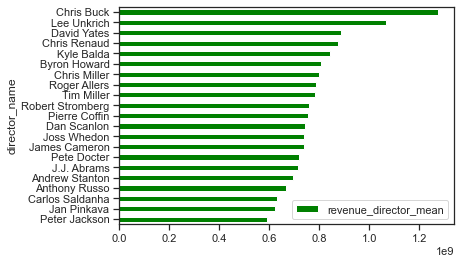

In [17]:
dfv = final_df[['director_name','revenue_director_mean']]
dfv =  dfv.drop_duplicates(subset=['director_name'])
dfv.sort_values(by='revenue_director_mean', inplace=True, ascending=False)
dfv.set_index('director_name')
dfv = dfv[20::-1]
#dfv
dfv.plot(kind='barh',x='director_name', y='revenue_director_mean', color='green')

### Lead Actor vs actors popularity

<AxesSubplot:ylabel='actor_1_name'>

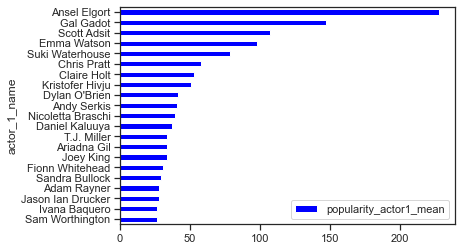

In [18]:
dfv = final_df[['actor_1_name','popularity_actor1_mean']]
dfv =  dfv.drop_duplicates(subset=['actor_1_name'])
dfv.sort_values(by='popularity_actor1_mean', inplace=True, ascending=False)
dfv.set_index('actor_1_name')
dfv = dfv[20::-1]
dfv.plot(kind='barh',x='actor_1_name', y='popularity_actor1_mean', color='blue')

<AxesSubplot:>

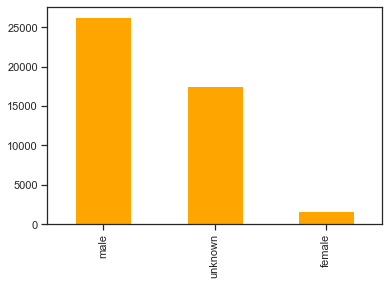

In [19]:
dfv = final_df['director_gender'].map({2:'male',1:'female',0:'unknown'})
dfv.value_counts().plot.bar(color='orange')

<AxesSubplot:>

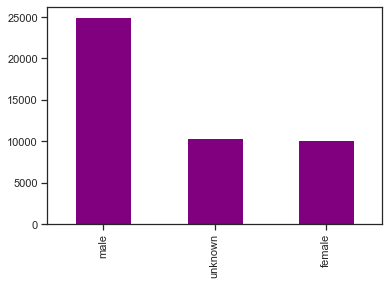

In [20]:
dfv = final_df['actor_1_gender'].map({2:'male',1:'female',0:'unknown'})
dfv.value_counts().plot.bar(color='purple')

### Data distribution  and visualization of Imdb-rating, genre score, Vote

1. plotting imdb-rating features

In [21]:
# plt.figsize((15,10))
dfr = final_df[['title','imdb_rating']]
# dfr =  dfr.drop_duplicates(subset=['imdb_rating'])
dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)
# dfr.set_index('title')
# dfr = dfr[20::-1]
# #dfv
# # plt.figure(figsize=(60,100))
# dfr.plot(kind='bar',xlabel = 'Title', ylabel='imdb_rating', color='green')
dfr.head(10)

<ipython-input-21-30b2238f487b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)


,title,imdb_rating
31204,Maidan,10.0
35951,Mera Naam Joker,10.0
38804,Butterfly,10.0
39526,Frankie Boyle: Hurt Like You've Never Been Loved,10.0
43313,Avetik,10.0
15951,Ollie Hopnoodle's Haven of Bliss,10.0
36612,Redemption,10.0
31068,Brave Revolutionary,10.0
24018,Stiff Upper Lips,10.0
6671,Simon Magus,10.0


In [22]:
dfr = final_df[['title','rate(revenue/budget)','imdb_rating']]
dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)
dfr.head(10)

<ipython-input-22-0371ef8f69f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr.sort_values(by='imdb_rating', inplace=True, ascending=False)


,title,rate(revenue/budget),imdb_rating
31204,Maidan,NaN,10.0
35951,Mera Naam Joker,NaN,10.0
38804,Butterfly,NaN,10.0
39526,Frankie Boyle: Hurt Like You've Never Been Loved,NaN,10.0
43313,Avetik,NaN,10.0
15951,Ollie Hopnoodle's Haven of Bliss,NaN,10.0
36612,Redemption,NaN,10.0
31068,Brave Revolutionary,NaN,10.0
24018,Stiff Upper Lips,NaN,10.0
6671,Simon Magus,NaN,10.0


### Observation
#### 1. most of the highest rating movies have missing profit rate
#### 2. we might need to take the sample from 5363 sample

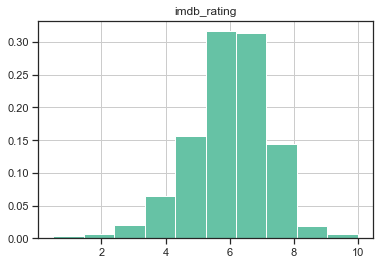

In [23]:
final_df.hist(column = 'imdb_rating',density=True);

Oservation:
1. maximim movies rating are on range of 5-7

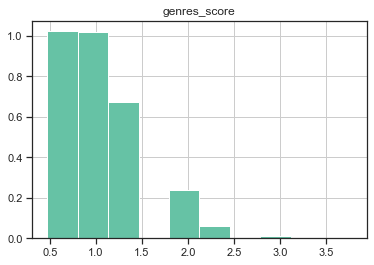

In [24]:
final_df.hist(column = 'genres_score',density=True);

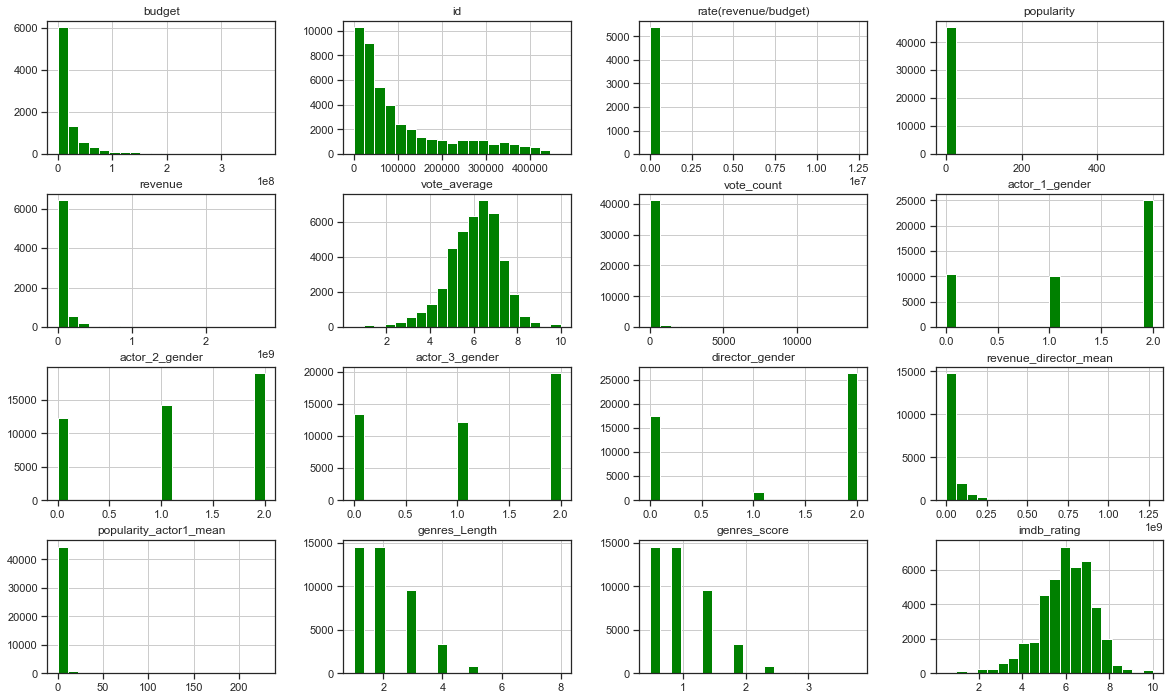

In [26]:
final_df.hist(bins=20,figsize=(20,12),color='g');

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  8912 non-null   float64
 1   genres                  43096 non-null  object 
 2   id                      45538 non-null  float64
 3   rate(revenue/budget)    5393 non-null   float64
 4   popularity              45469 non-null  float64
 5   release_date            45451 non-null  object 
 6   revenue                 7428 non-null   float64
 7   title                   45535 non-null  object 
 8   vote_average            42531 non-null  float64
 9   vote_count              42630 non-null  float64
 10  actor_1_gender          45538 non-null  int64  
 11  actor_2_gender          45538 non-null  int64  
 12  actor_3_gender          45538 non-null  int64  
 13  actor_1_name            45538 non-null  object 
 14  actor_2_name            45538 non-null

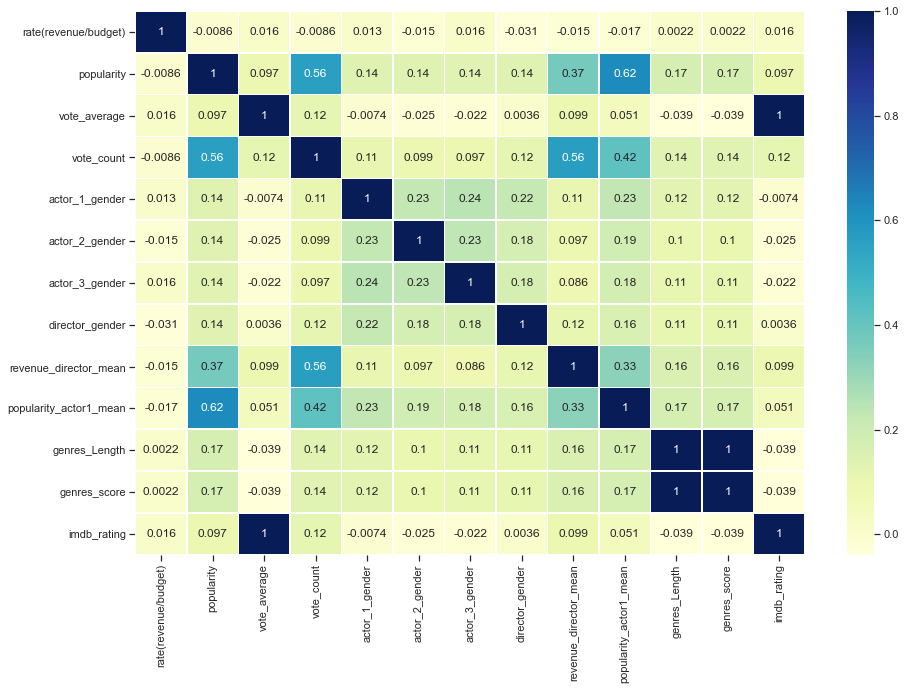

In [25]:
# df = final_df.copy()
# df = df.drop(columns = ['genres','release_date','title', 'actor_1_name','actor_2_name','actor_3_name','director_name'])
# df.info()
df = final_df.drop(columns = ['id','budget','revenue'])
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5);